# Projet Text Mining

## Librairies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#import contractions
import nltk 
import time
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [3]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()

In [0]:
print("hello world")

## Importation des datas

In [4]:
df = pd.read_csv('Data/dataset.csv', sep='\t', header = None, names = ["Avis"], nrows=10)
labels = pd.read_csv('Data/labels.csv', sep='\t', header = None, names = ['Note'])
#sns.heatmap(df.isnull(), cbar=False)
all = pd.concat([df.Avis,labels.Note], sort =True)

display(df)

,Avis
0,Obviously made to show famous 1950s stripper M...
1,This film was more effective in persuading me ...
2,Unless you are already familiar with the pop s...
3,From around the time Europe began fighting Wor...
4,Im not surprised that even cowgirls get the bl...
5,(48 out of 278 people found this comment usefu...
6,Went to watch this movie expecting a 'nothing ...
7,A good cast and they do their best with what t...
8,The only thing that kept me from vomiting afte...
9,"I just watched this film 15 minutes ago, and I..."


# Etape 1 : Rechercher les meilleurs pré-traitements et les meilleurs classifieurs

Dans cette étape vous pourrez effectuer différents prétraitements et utiliser différents classifieurs
afin de rechercher ceux qui sont les plus efficaces. Il ne faut pas hésiter à utiliser différents
classifieurs car un classifieur qui s’avère efficace sur un jeu de données est peut être inefficace sur
un autre jeu de données. Attention également à l’évaluation de vos modèles.

### 2) Nettoyage des données

In [42]:
dfc=df.Avis.copy()
dfc_phrases = df.Avis.copy()

debut = time.time()
for i in range(0, len(df)-1, 1):
    
    dfc[i]=''.join(dfc[i]).lower() #jusqu'ici c'est une liste
    dfc[i]=sent_tokenize(dfc[i])# ici cast de la liste en string(avis entier)
    dfc_phrases[i] = dfc[i] # Ici on va chuck nos phrase et apposer nos tag

    for j in range(0, len(dfc.loc[i])-1, 1):
        
        #dfc.loc[i][j]= contractions.fix(dfc.loc[i][j])
        dfc.loc[i][j]=dfc.loc[i][j].lower()
        dfc.loc[i][j]=word_tokenize(dfc.loc[i][j])
        sentence = dfc.loc[i][j]
        sentence_without_sw = sentence# creation d'une liste de phrase tmp
        for word in sentence:
            #word = nltk.pos_tag(wnl.lemmatize(word, pos='v'))
            for sw in stop_words:
                if word==sw or word=="." or word==":" or word=="," or word==";" or word==')' or word =='(':
                    if word in sentence_without_sw:
                        sentence_without_sw.remove(word)
        sentence = sentence_without_sw #permet de retirer les stop word sans changer la longueur de la liste
fin = time.time()
print("Le temps écoulé pour ce traitement a prit : ", fin-debut)
display(dfc[0][1]) 
#1 ere ligne bien parsé mais pas taggé => ['obviously', 'made', 'show', 'famous', '1950s', 'stripper',
#'misty', 'ayers', '``', 'acting', "''", 'talents']

Le temps écoulé pour ce traitement a prit :  0.14667582511901855


['bad',
 'ca',
 "n't",
 'act.boring',
 'little',
 'tale',
 'sweet',
 'innocent',
 'sally',
 'ayers',
 'being',
 'drugged',
 'forced',
 'white',
 'slavery',
 'prostitution',
 '.']

Création d'une liste de StopWords et mots à supprimer de tous nos commentaires car inutiles !

In [0]:
stop_words2 = set(["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"])

### Tag des mots & chunking & chanking

L'ajout de tag aux mots est très important car il permet de leur donner un certain poid lors de l'analyse.

In [0]:
nltk.help.upenn_tagset()

In [44]:
from nltk import pos_tag
token = []
for i in range(0, len(df)-1, 1):
    for j in range(0, len(dfc.loc[i])-1, 1):
        token = pos_tag(dfc_phrases[i][j])
        dfc_phrases[i][j] = token


In [45]:
display(dfc_phrases[0][0])

[('obviously', 'RB'),
 ('made', 'VBD'),
 ('show', 'NN'),
 ('famous', 'JJ'),
 ('1950s', 'CD'),
 ('stripper', 'NN'),
 ('misty', 'NN'),
 ('ayers', 'NNS'),
 ('``', '``'),
 ('acting', 'VBG'),
 ("''", "''"),
 ('talents', 'NNS')]

In [54]:
from nltk.tokenize import PunktSentenceTokenizer

#Quelques tests de regex

PHRASE = r"""Chunk: {<RB.?>*<VB.?>*<NNP>}"""
VBNN = r"""Chunk: {<VB.?>*<NN.?>}"""
NN = r"""Chunk : {<NN.>} """ # Noms
JJ = r"""Chunk : {<JJ.?>}""" # Adjectifs


chunkParser = nltk.RegexpParser(VBNN)

chunked = chunkParser.parse(dfc_phrases[2][0])
print(chunked)
#chunked.draw()

            

(S
  unless/IN
  are/VBP
  already/RB
  familiar/JJ
  (Chunk pop/NN)
  (Chunk stars/NNS)
  (Chunk star/VBP film/NN)
  save/VB
  the/DT
  (Chunk time/NN)
  (Chunk stop/VB reading/VBG review/NN)
  've/VBP
  reached/VBN
  the/DT
  (Chunk end/NN)
  the/DT
  next/JJ
  (Chunk sentence.forget/NN)
  you/PRP
  ever/RB
  stumbled/VBD
  upon/IN
  this/DT
  (Chunk film/NN)
  (Chunk go/VB watch/NN)
  (Chunk something/NN)
  (Chunk else.but/NN)
  you/PRP
  (Chunk insist/VBP reading/VBG consider/NN)
  lame/JJ
  (Chunk vehicle/NN)
  japanese/JJ
  teen/JJ
  idol/JJ
  pretty-boys/JJ
  featuring/VBG
  nonsensical/JJ
  convoluted/VBN
  ``/``
  (Chunk plot/NN)
  ''/''
  (Chunk drags/NNS)
  for/IN
  insufferable/JJ
  (Chunk amount/NN)
  (Chunk time/NN)
  you/PRP
  're/VBP
  ready/JJ
  scream.nothing/VBG
  this/DT
  (Chunk film/NN)
  (Chunk makes/VBZ sense/NN))


Retrait des symboles et conjonctions de coordinations

In [59]:
TRASH = r"""Chunk : {<.*>+}
                        }<SYM|CC|IN>+{""" # Anything + symboles ou CC 


# Je ne comprends pas encore trop comment ça marche ni les manipuler,  à déveloper

chunkParser = nltk.RegexpParser(TRASH)

chunked = chunkParser.parse(dfc_phrases[3][0])
print(chunked)

(S
  around/IN
  (Chunk
    time/NN
    europe/NN
    began/VBD
    fighting/VBG
    world/NN
    war/NN
    ii/NN)
  until/IN
  (Chunk war/NN 's/POS end/NN hollywood/NN)
  with/IN
  (Chunk
    significant/JJ
    prodding/VBG
    government/NN
    made/VBD
    tons/NNS
    movies/NNS
    were/VBD
    designed/VBN
    try/NN
    get/VB
    young/JJ
    men/NNS
    enlist/VBP
    the/DT
    army/NN
    making/VBG
    the/DT
    life/NN
    a/DT
    serviceman/JJ
    appear/VBP
    ``/``
    cool/JJ
    ''/''))


### Relation entre les mots : N-Grams tokenizing

In [0]:
train = 

bigram_tagger = nltk.BigramTagger(train)
#bigram_tagger.tag(train)

### Bag of Words

Une fois que nos data ont subit tous les pré-traitements, créer un nouveau fichier avec les données néttoyées pour permettre l'application de bag of Words. </br>
Peut être que les bag of words ne sont à appliquer que sur les mots les plus significatifs?

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
with open ("./Data/dataset.csv", "r") as file:
    X_train_counts = count_vect.fit_transform(file)
    

In [0]:
display(X_train_counts.shape)

In [0]:
display(X_train_counts.todense() )

In [15]:
from nltk.probability import FreqDist
fdist = FreqDist(tokens)

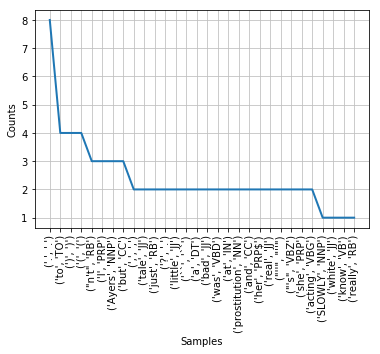

In [17]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk